# I. Business Understanding

## The objective of this project is:

To learn how to apply machine learning/data mining methods to real-world data sets.

The project covers all stages of data mining, from setting objectives to drawing conclusions.

What factors influence student performance the most?

(Which variables have the highest impact on final grades?)

How does access to educational resources (extra classes, internet) affect student grade outcomes?



# II. Data Understanding
The dataset is available at the UCI Machine Learning Repository, with the following link: https://archive.ics.uci.edu/dataset/320/student+performance

In [295]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

student_performance = fetch_ucirepo(id=320)

X = student_performance.data.features
y = student_performance.data.targets

y = y.loc[:, y.columns.difference(['G1', 'G2'])]

X = X.drop(['address', 'school', 'reason'], axis=1)


X.head(20)


,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,GT3,A,4,4,at_home,teacher,mother,2,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,GT3,T,1,1,at_home,other,father,1,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,LE3,T,1,1,at_home,other,mother,1,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,GT3,T,4,2,health,services,mother,1,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,GT3,T,3,3,other,other,father,1,...,yes,no,no,4,3,2,1,2,5,0
5,M,16,LE3,T,4,3,services,other,mother,1,...,yes,yes,no,5,4,2,1,2,5,6
6,M,16,LE3,T,2,2,other,other,mother,1,...,yes,yes,no,4,4,4,1,1,3,0
7,F,17,GT3,A,4,4,other,teacher,mother,2,...,yes,no,no,4,1,4,1,1,1,2
8,M,15,LE3,A,3,2,services,other,mother,1,...,yes,yes,no,4,2,2,1,1,1,0
9,M,15,GT3,T,3,4,other,other,mother,1,...,yes,yes,no,5,5,1,1,1,5,0


The dataset contains 649 records and 30 features.

In [296]:
X.shape, y.shape

((649, 27), (649, 1))

In [297]:
print(student_performance.variables)

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

The dataset contains student-related attributes, including demographic, academic, and behavioral characteristics. It includes both numerical and categorical values describing students' background, study habits, and extracurricular activities. The dataset also contains students' grades (G1, G2, and G3), which represent their performance in different periods, with G3 being the final grade. The dataset does not contain missing values.

# III. Data Preparation

Handle possible missing values

In [298]:
from sklearn.preprocessing import StandardScaler

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Convert boolean columns to int
X = X.astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,0,1,0,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,0,0,1,0,1,1,1,1,0


                      age      Medu      Fedu  traveltime  studytime  \
age              1.000000 -0.107832 -0.121050    0.034490  -0.008415   
Medu            -0.107832  1.000000  0.647477   -0.265079   0.097006   
Fedu            -0.121050  0.647477  1.000000   -0.208288   0.050400   
traveltime       0.034490 -0.265079 -0.208288    1.000000  -0.063154   
studytime       -0.008415  0.097006  0.050400   -0.063154   1.000000   
failures         0.319968 -0.172210 -0.165915    0.097730  -0.147441   
famrel          -0.020559  0.024421  0.020256   -0.009521  -0.004127   
freetime        -0.004910 -0.019686  0.006841    0.000937  -0.068829   
goout            0.112805  0.009536  0.027690    0.057454  -0.075442   
Dalc             0.134768 -0.007018  0.000061    0.092824  -0.137585   
Walc             0.086357 -0.019766  0.038445    0.057007  -0.214925   
health          -0.008750  0.004614  0.044910   -0.048261  -0.056433   
absences         0.149998 -0.008577  0.029859   -0.008149  -0.11

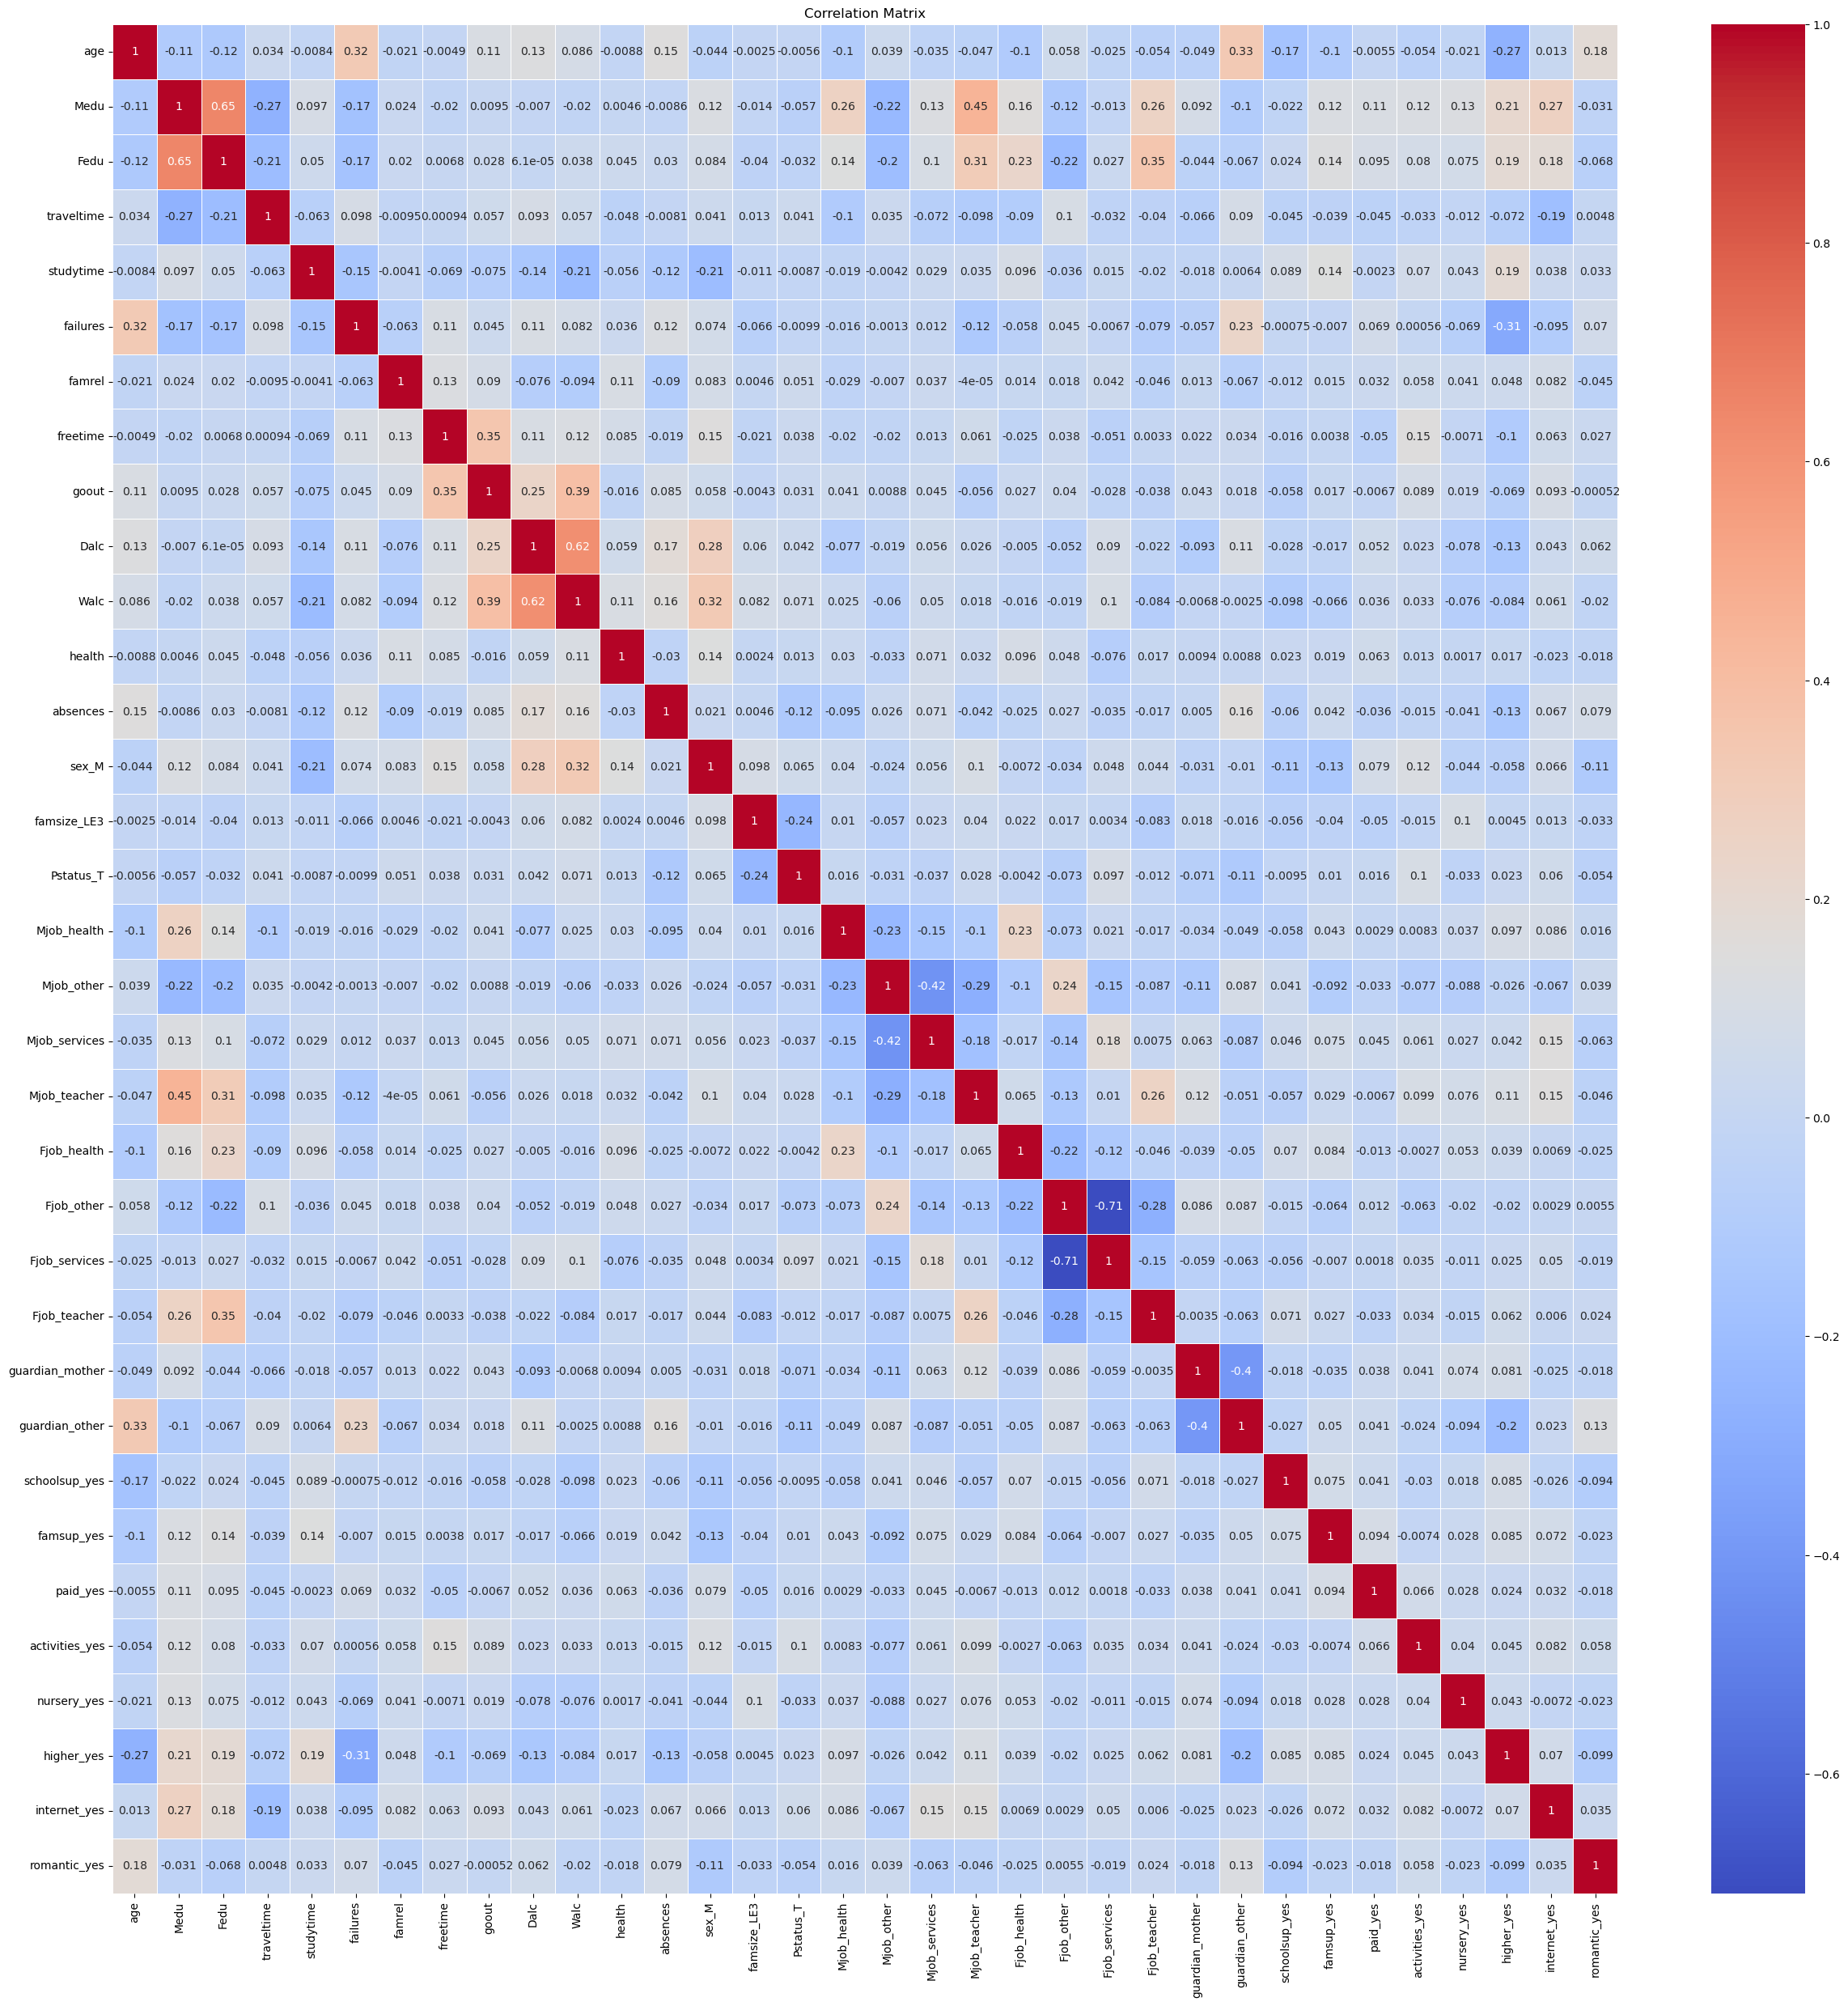

In [299]:
# Calculate the correlation matrix
corr_matrix = X.corr()

print(corr_matrix)

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [300]:
X.head(20)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,0,1,0,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,0,0,1,0,1,1,1,1,0


# IV. Modeling

Understand the relationship between alcohol usage, internet access and the grade

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Use G3 as a regression target and G3 as a classification target
y_reg = y['G3']
y_class = y['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

# Split the data for regression and classification
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)


# V. Evaluation

In [302]:
from sklearn.metrics import mean_absolute_error, r2_score

# Regression: Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train_reg)

b0 = regressor.intercept_  # Intercept (constant term)
b1 = regressor.coef_[0]  # Coefficients for each feature (array)
print("Intercept: %.2f" % b0 + ", Coefficient: %.4f" % b1)

y_pred_reg = regressor.predict(X_test)
print("MAE (Mean Absolute Error):", mean_absolute_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))


Intercept: 11.88, Coefficient: 0.1361
MAE (Mean Absolute Error): 2.0926811402737746
R² Score: 0.1872703200223279


In [303]:
from sklearn.metrics import accuracy_score, classification_report

# Classification: Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_class, y_train_class)

y_pred_class = classifier.predict(X_test_class)
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))


Accuracy: 0.8923076923076924
              precision    recall  f1-score   support

        Fail       0.60      0.20      0.30        15
        Pass       0.90      0.98      0.94       115

    accuracy                           0.89       130
   macro avg       0.75      0.59      0.62       130
weighted avg       0.87      0.89      0.87       130

